In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [38]:
# physics
K = 1.0
G = 0.5
rho = 1.0
dmp = 1

# numerics 
lx = 10.0
ly = 10.0
nx = 200
ny = 200
nsteps = 800
cfl = 0.5

#preprocessing
x = np.linspace( -0.5 * lx, 0.5 * lx, nx) 
y = np.linspace( -0.5 * ly, 0.5 * ly, ny) 
x, y = np.meshgrid(x, y, indexing = 'ij')

dx = lx / (nx - 1)
dy = ly / (ny - 1)

dt = cfl * min(dx, dy) / np.sqrt(( K + 4.0 * G / 3.0) / rho)

# init
p0 = 1.0
p = p0 * np.exp(- x * x - y * y)

tauxx = np.zeros((nx, ny))
tauyy = np.zeros((nx, ny))
tauxy = np.zeros((nx - 1, ny - 1))

vx = np.zeros((nx + 1, ny))
vy = np.zeros((nx, ny + 1))

In [39]:
# Define initial conditions
def initialize():
    global p, tauxx, tauyy, tauxy, vx, vy
    p = p0 * np.exp(-x**2 - y**2)
    tauxx = np.zeros((nx, ny))
    tauyy = np.zeros((nx, ny))
    tauxy = np.zeros((nx - 1, ny - 1))
    vx = np.zeros((nx + 1, ny))
    vy = np.zeros((nx, ny + 1))

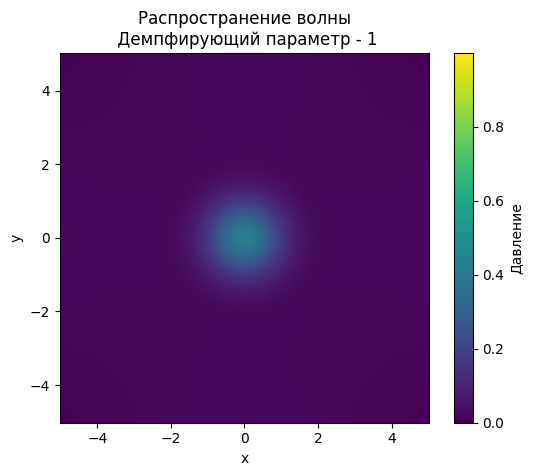

In [40]:
# Initialize plot
fig, ax = plt.subplots()
cbar = plt.colorbar(ax.pcolormesh(x, y, p, shading='auto'), ax=ax)
ax.set_aspect('equal')
ax.set_title("Распространение волны\n Демпфирующий параметр - {:}".format(dmp))
ax.set_xlabel("x")
ax.set_ylabel("y")
cbar.set_label("Давление")

# Update function for animation
def update(frame):
    global p, tauxx, tauyy, tauxy, vx, vy
    div_v = np.diff(vx, axis=0) / dx + np.diff(vy, axis=1) / dy
    p = p - div_v * K * dt
    
    tauxx = tauxx + (np.diff(vx, axis=0) / dx - div_v / 3.0) * 2.0 * G * dt
    tauyy = tauyy + (np.diff(vy, axis=1) / dy - div_v / 3.0) * 2.0 * G * dt
    tauxy = tauxy + (np.diff(vx[1:-1, :], axis=1) / dy + np.diff(vy[:, 1:-1], axis=0) / dx) * G * dt

    dvxdt = (np.diff(-p[:, 1:-1] + tauxx[:, 1:-1], axis=0) / dx +
             np.diff(tauxy, axis=1) / dy) / rho
    dvydt = (np.diff(-p[1:-1, :] + tauyy[1:-1, :], axis=1) / dy +
             np.diff(tauxy, axis=0) / dx) / rho
    
    vx[1:-1, 1:-1] = (1 - dmp * dt) * vx[1:-1, 1:-1] + dvxdt * dt
    vy[1:-1, 1:-1] = (1 - dmp * dt) * vy[1:-1, 1:-1] + dvydt * dt
    
    mesh.set_array(p.ravel())  # Update data for colormap
    return mesh,

# Create animation
initialize()
mesh = ax.pcolormesh(x, y, p, shading='auto')
ani = FuncAnimation(fig, update, frames=nsteps, blit=True, interval = 10)
ani.save("wave2d_damp.mp4")
plt.show()

In [41]:
dt

np.float64(0.01946222787038903)